#Dataset

In [1]:
import cv2 # OpenCV
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import os
import tensorflow_datasets as tfds
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
path = "FULL"
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   validation_split=0.5)
training_set = train_datagen.flow_from_directory(path+"/train",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

validation_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True)
validation_set = train_datagen.flow_from_directory(path+"/test",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

Found 15923 images belonging to 7 classes.
Found 3976 images belonging to 7 classes.


In [72]:
def parse_image(filename):
  parts = filename.split('/')
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [224, 224])
  return image, label

def load_data(dir, manual_labelling=-1, class_names=None):
    dir_names = os.listdir(dir)

    X = []
    y = []
    for i in range(len(dir_names)):
        class_dir = dir + "/" + dir_names[i]
        filenames = os.listdir(class_dir)

        images = []
        print("reading", class_dir)
        total = len(filenames)
        count = 0
        for file in filenames:
            image, label = parse_image(class_dir + "/" + file)
            X.append(image)

            if manual_labelling != -1:
                y.append(manual_labelling)
            else:
                if label == 'angry':
                    y.append(0)
                elif label == 'disgust':
                    y.append(1)
                elif label == 'fear':
                    y.append(2)
                elif label == 'happy':
                    y.append(3)
                elif label == 'neutral':
                    y.append(4)
                elif label == 'sad':
                    y.append(5)
                elif label == 'suprise':
                    y.append(6)
                else:
                    print("NO LABEL")
            count+=1
    if manual_labelling != -1:
        return tf.stack(X), tf.stack(y), class_names
    else:
        return tf.stack(X), tf.one_hot(tf.stack(y), len(class_names))


In [73]:
angry_set_x, angry_set_y = load_data(path+"/test/test_angry", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

disgust_set_x, disgust_set_y = load_data(path+"/test/test_disgust", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

fear_set_x, fear_set_y = load_data(path+"/test/test_fear", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

happy_set_x, happy_set_y = load_data(path+"/test/test_happy", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

neutral_set_x, neutral_set_y = load_data(path+"/test/test_neutral", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

sad_set_x, sad_set_y = load_data(path+"/test/test_sad", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

suprise_set_x, suprise_set_y = load_data(path+"/test/test_suprise", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

stress_set_x, stress_set_y = load_data(path+"/test/stress", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

non_stress_set_x, non_stress_set_y = load_data(path+"/test/non_stress", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

reading FULL/test/test_angry/angry
reading FULL/test/test_disgust/disgust
reading FULL/test/test_fear/fear
reading FULL/test/test_happy/happy
reading FULL/test/test_neutral/neutral
reading FULL/test/test_sad/sad
reading FULL/test/test_suprise/suprise
reading FULL/test/stress/angry
reading FULL/test/stress/disgust
reading FULL/test/stress/fear
reading FULL/test/non_stress/happy
reading FULL/test/non_stress/neutral
reading FULL/test/non_stress/sad
reading FULL/test/non_stress/suprise


In [20]:
angry_set = train_datagen.flow_from_directory(path+"/test/test_angry",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

disgust_set = train_datagen.flow_from_directory(path+"/test/test_disgust",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

fear_set = train_datagen.flow_from_directory(path+"/test/test_fear",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

happy_set = train_datagen.flow_from_directory(path+"/test/test_happy",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

neutral_set = train_datagen.flow_from_directory(path+"/test/test_neutral",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')


sad_set = train_datagen.flow_from_directory(path+"/test/test_sad",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

suprise_set = train_datagen.flow_from_directory(path+"/test/test_suprise",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

stress_set = train_datagen.flow_from_directory(path+"/test/stress",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

non_stress_set = train_datagen.flow_from_directory(path+"/test/non_stress",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

Found 535 images belonging to 1 classes.
Found 115 images belonging to 1 classes.
Found 562 images belonging to 1 classes.
Found 949 images belonging to 1 classes.
Found 659 images belonging to 1 classes.
Found 674 images belonging to 1 classes.
Found 482 images belonging to 1 classes.
Found 1212 images belonging to 3 classes.
Found 2764 images belonging to 4 classes.


#VGG16

In [2]:
VGG16_FineTune = tf.keras.models.load_model('new_model.keras')
VGG16_Reverse = tf.keras.models.load_model('VGG16Augmented_Model_Reverse.keras')
VGG16_FullFreeze = tf.keras.models.load_model('VGG16Augmented_Model_FullFreeze.keras')

VGG16_FineTune.evaluate(validation_set)
VGG16_Reverse.evaluate(validation_set)
VGG16_FullFreeze.evaluate(validation_set)

63/63 [==============================] - 417s 7s/step - loss: 1.3171 - accuracy: 0.5229


[1.3171380758285522, 0.5228873491287231]

In [76]:
#fine tune
print("angry :")
VGG16_FineTune.evaluate(angry_set_x,angry_set_y)
print("disgust :")
VGG16_FineTune.evaluate(disgust_set_x,disgust_set_y)
print("fear :")
VGG16_FineTune.evaluate(fear_set_x, fear_set_y)
print("happy :")
VGG16_FineTune.evaluate(happy_set_x, happy_set_y)
print("neutral :")
VGG16_FineTune.evaluate(neutral_set_x, neutral_set_y)
print("sad :")
VGG16_FineTune.evaluate(sad_set_x,sad_set_y)
print("surprise :")
VGG16_FineTune.evaluate(suprise_set_x, suprise_set_y)

print("Stress :")
VGG16_FineTune.evaluate(stress_set_x, stress_set_y)

print("Non-Stress :")
VGG16_FineTune.evaluate(non_stress_set_x, non_stress_set_y)

angry :
34/34 [==============================] - 97s 3s/step - loss: 2.1989 - accuracy: 0.4088
disgust :
8/8 [==============================] - 21s 3s/step - loss: 6.6892 - accuracy: 0.2043
fear :
36/36 [==============================] - 106s 3s/step - loss: 2.9039 - accuracy: 0.2609
happy :
60/60 [==============================] - 193s 3s/step - loss: 1.6621 - accuracy: 0.6280
neutral :
42/42 [==============================] - 137s 3s/step - loss: 2.3666 - accuracy: 0.3194
sad :
43/43 [==============================] - 140s 3s/step - loss: 1.9755 - accuracy: 0.4399
surprise :
31/31 [==============================] - 99s 3s/step - loss: 1.7580 - accuracy: 0.6068
Stress :
76/76 [==============================] - 258s 3s/step - loss: 2.9522 - accuracy: 0.3208
Non-Stress :
173/173 [==============================] - 579s 3s/step - loss: 1.9232 - accuracy: 0.5049


[1.9232275485992432, 0.5048842430114746]

In [77]:
#reverse
print("angry :")
VGG16_Reverse.evaluate(angry_set_x,angry_set_y)
print("disgust :")
VGG16_Reverse.evaluate(disgust_set_x,disgust_set_y)
print("fear :")
VGG16_Reverse.evaluate(fear_set_x, fear_set_y)
print("happy :")
VGG16_Reverse.evaluate(happy_set_x, happy_set_y)
print("neutral :")
VGG16_Reverse.evaluate(neutral_set_x, neutral_set_y)
print("sad :")
VGG16_Reverse.evaluate(sad_set_x,sad_set_y)
print("surprise :")
VGG16_Reverse.evaluate(suprise_set_x, suprise_set_y)

print("Stress :")
VGG16_Reverse.evaluate(stress_set_x, stress_set_y)

print("Non-Stress :")
VGG16_Reverse.evaluate(non_stress_set_x, non_stress_set_y)

angry :
34/34 [==============================] - 109s 3s/step - loss: 2.4083 - accuracy: 0.4649
disgust :
8/8 [==============================] - 24s 3s/step - loss: 8.7349 - accuracy: 0.1783
fear :
36/36 [==============================] - 116s 3s/step - loss: 4.3901 - accuracy: 0.2244
happy :
60/60 [==============================] - 199s 3s/step - loss: 1.4293 - accuracy: 0.7450
neutral :
42/42 [==============================] - 134s 3s/step - loss: 2.9260 - accuracy: 0.4211
sad :
43/43 [==============================] - 137s 3s/step - loss: 3.6015 - accuracy: 0.2834
surprise :
31/31 [==============================] - 94s 3s/step - loss: 3.9138 - accuracy: 0.4575
Stress :
76/76 [==============================] - 254s 3s/step - loss: 3.9280 - accuracy: 0.3262
Non-Stress :
173/173 [==============================] - 562s 3s/step - loss: 2.7491 - accuracy: 0.5051


[2.749089241027832, 0.5050651431083679]

In [78]:
#FullFreeze
print("angry :")
VGG16_FullFreeze.evaluate(angry_set_x,angry_set_y)
print("disgust :")
VGG16_FullFreeze.evaluate(disgust_set_x,disgust_set_y)
print("fear :")
VGG16_FullFreeze.evaluate(fear_set_x, fear_set_y)
print("happy :")
VGG16_FullFreeze.evaluate(happy_set_x, happy_set_y)
print("neutral :")
VGG16_FullFreeze.evaluate(neutral_set_x, neutral_set_y)
print("sad :")
VGG16_FullFreeze.evaluate(sad_set_x,sad_set_y)
print("surprise :")
VGG16_FullFreeze.evaluate(suprise_set_x, suprise_set_y)

print("Stress :")
VGG16_FullFreeze.evaluate(stress_set_x, stress_set_y)

print("Non-Stress :")
VGG16_FullFreeze.evaluate(non_stress_set_x, non_stress_set_y)

angry :
34/34 [==============================] - 113s 3s/step - loss: 3.6694 - accuracy: 0.2460
disgust :
8/8 [==============================] - 25s 3s/step - loss: 24.9382 - accuracy: 0.0000e+00
fear :
36/36 [==============================] - 118s 3s/step - loss: 5.2582 - accuracy: 0.1692
happy :
60/60 [==============================] - 193s 3s/step - loss: 1.3285 - accuracy: 0.6322
neutral :
42/42 [==============================] - 135s 3s/step - loss: 4.7548 - accuracy: 0.1176
sad :
43/43 [==============================] - 142s 3s/step - loss: 2.2590 - accuracy: 0.5660
surprise :
31/31 [==============================] - 94s 3s/step - loss: 6.2671 - accuracy: 0.1784
Stress :
76/76 [==============================] - 246s 3s/step - loss: 6.4259 - accuracy: 0.1870
Non-Stress :
173/173 [==============================] - 553s 3s/step - loss: 3.2335 - accuracy: 0.4143


[3.233532667160034, 0.41425469517707825]

In [18]:
label = list(validation_set.class_indices.keys())

In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import imageio
from tensorflow_docs.vis import embed

In [39]:
def predict(path, model, count, lenght):
    image = cv2.imread(path)
    image = cv2.resize(image,(224,224))
    image_arr = image.reshape(1,224,224,3)

    predicted = model.predict(image_arr)
    predicted = tf.concat(predicted, axis=0)
    predicted = tf.argmax(predicted, axis=1)
    fig = plt.figure(figsize=(2*lenght, 2*lenght)) 
    fig.add_subplot(1, lenght, count) 
    plt.title(label[predicted.numpy()[0]])
    plt.imshow(image)


1/1 [==============================] - 1s 1s/step


C:\Users\Alvin\AppData\Local\Temp\ipykernel_18120\793712588.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(2*lenght, 2*lenght))


1/1 [==============================] - 0s 117ms/step


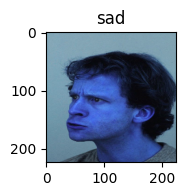

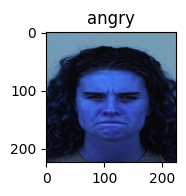

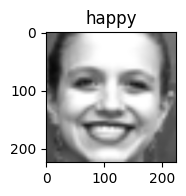

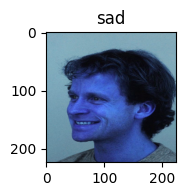

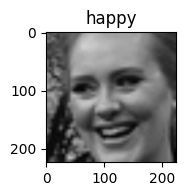

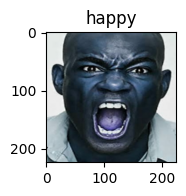

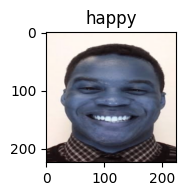

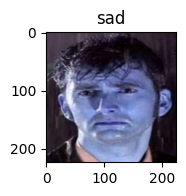

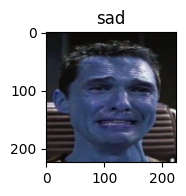

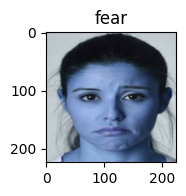

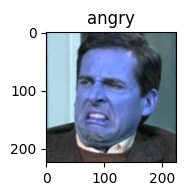

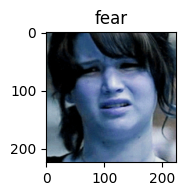

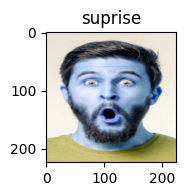

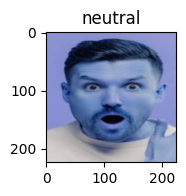

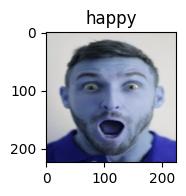

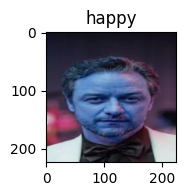

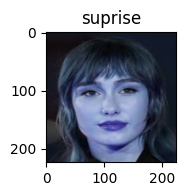

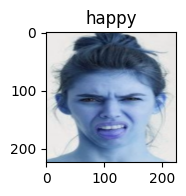

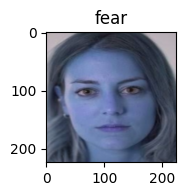

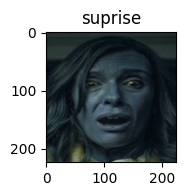

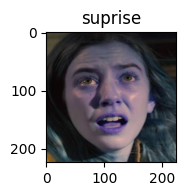

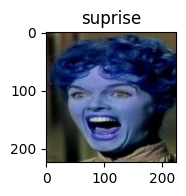

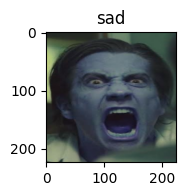

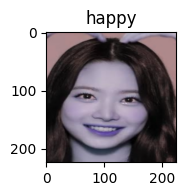

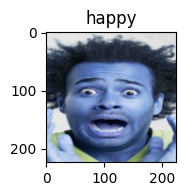

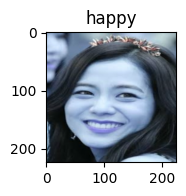

In [40]:
path = [
    "test/test1.jpg", "test/test2.jpg", "test/test3.png","test/test4.jpg", 
    "test/test5.jpg", "test/test6.jpg", "test/test7.jpg", "test/test8.jpg",
    "test/test9.jpg", "test/test10.jpg", "test/test11.jpg", "test/test12.jpg", 
    "test/test13.jpg", "test/test14.jpg", "test/test15.jpg", "test/test16.jpg",
    "test/test17.jpg", "test/test18.jpg", "test/test19.jpg", "test/test20.jpg",
    "test/test21.jpg", "test/test22.jpg", "test/test23.jpg","test/test24.jpg",
    "test/test25.jpg", "test/test26.jpg",
    ]
count = 1
for temp in path:
    predict(temp, VGG16_FineTune, count, len(path))
    count= count + 1

In [24]:
def format_frames(frame, output_size):
  """
    Pad and resize an image from a video.

    Args:
      frame: Image that needs to resized and padded.
      output_size: Pixel size of the output frame image.

    Return:
      Formatted frame with padding of specified output size.
  """
  frame = tf.image.convert_image_dtype(frame, tf.float32)
  frame = tf.image.resize_with_pad(frame, *output_size)
  return frame

In [25]:
def frames_from_video_file(video_path, n_frames, output_size = (224,224), frame_step = 15):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  src = cv2.VideoCapture(str(video_path))

  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

  need_length = 1 + (n_frames - 1) * frame_step

  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)

  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  result.append(format_frames(frame, output_size))

  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:
      frame = format_frames(frame, output_size)
      result.append(frame)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  result = np.array(result)[..., [2, 1, 0]]

  return result

In [26]:
def to_gif(images, fps):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, duration=(5000 * 1/fps))
  return embed.embed_file('./animation.gif')

In [28]:
def predictVidio(testvidio, model, lenght, showImage= True):
    count = 1
    predictedVidio = [0,0,0,0,0,0,0]
    for image in testvidio:
        image = cv2.resize(image,(224,224))
        image_arr = image.reshape(1,224,224,3)

        predicted = model.predict(image_arr)
        predicted = tf.concat(predicted, axis=0)
        predicted = tf.argmax(predicted, axis=1)
        if showImage:
            fig = plt.figure(figsize=(2*lenght, 2*lenght)) 
            fig.add_subplot(1, lenght, count) 
            plt.title(label[predicted.numpy()[0]])
            plt.imshow(image)
        predictedVidio[predicted.numpy()[0]] += 1
        count = count+1
    return predictedVidio


1/1 [==============================] - 0s 113ms/step
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']
[9, 0, 3, 0, 0, 8, 0]


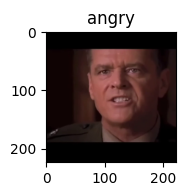

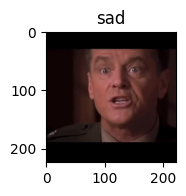

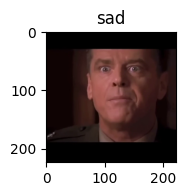

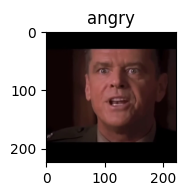

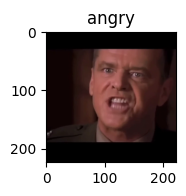

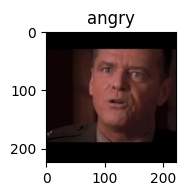

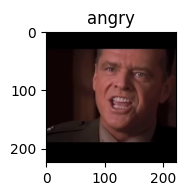

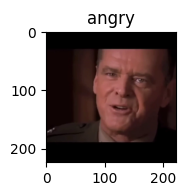

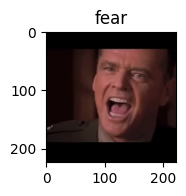

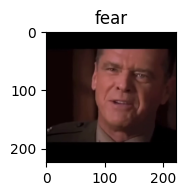

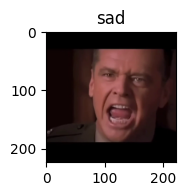

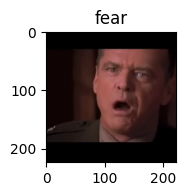

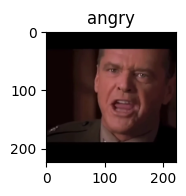

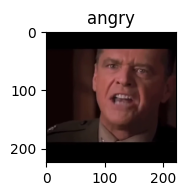

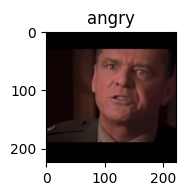

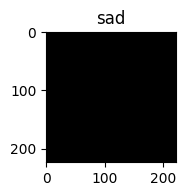

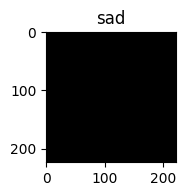

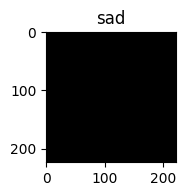

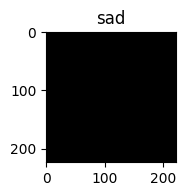

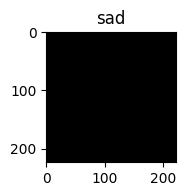

In [37]:
testvidio = frames_from_video_file("test/testvid5.mp4", 20)
result = predictVidio(testvidio, VGG16_FineTune, 20, True)
print(label)
print(result)
# to_gif(testvidio, 20)